# Tarea 1

En esta libreda de Jupyter se solucionan los problemas de la tarea 1.

Autor: <b>Nicolás Quijada</b>

---

## Ejercicio 1

Lectura de datos


---


## Ejercicio 2: Derivación e integración numérica

### Derivación numérica hasta cuarto orden

En este ejercicio programamos un algoritmo que nos de la derivada numérica de una función cuyo dominio esté espaciado uniformemente por una distancia $h$. La estrategia a seguir es la siguiente:

<ul>
    <li>Utilizar la deducción para la derivada en un punto $f_i$ en el interior de la malla.<\li>
    <li>Programar la derivada para los puntos en el conjunto ${x_2,\dots,x_{x-2}}$</li>
    <li>Programar la derivada para los puntos faltantes del dominio</li>


In [2]:
from pylab import *

In [3]:
def der_h4(x,f): #La función recibe una cantidad de puntos x y sus imágenes en f en forma de listas
    f_prima = zeros_like(f) #Creamos una lista con espacio para cada punto a derivar
    h = x[1] - x[0] #Definimos el espaciado uniforme de la malla x como. 
    for i in range(2,len(f)-2): #Calculamos la derivada para los puntos interiores y excluimos al segundo y penúltimo.
        f_prima[i] = (-f[i+2] + 8*f[i+1]-8*f[i-1] + f[i-2])/(12*h) #Fórmula calculada con Taylor
    
    #Ahora calculamos la derivada en los puntos faltantes con la dedución del sistema de ecuaciones
    f_prima[0] = (-25/12*f[0] + 4*f[1] - 3*f[2] +4/3*f[3] - 1/4*f[4])/h
    f_prima[1] = (-25/12*f[1] + 4*f[2] - 3*f[3] +4/3*f[4] - 1/4*f[5])/h
    f_prima[-1] = (-25/12*f[-1] + 4*f[-2] - 3*f[-3] +4/3*f[-4] - 1/4*f[-5])/(-h)
    f_prima[-2] = (-25/12*f[-2] + 4*f[-3] - 3*f[-4] +4/3*f[-5] - 1/4*f[-6])/(-h)
    
    return f_prima #Regresa la lista con la derivada numérica en cada punto


---

A continuación una función de prueba

---

In [4]:
x = linspace(0, 4*pi, 100) #Damos un dominio equiparticionado entre 0 y 4pi con 100 puntos
y = x*sin(x) # Creamos una lista con la función evaluada en cada punto del dominio
dy = sin(x)+x*cos(x) #Derivada analítica
der_h4 = der_h4(x,y) #Evaluación con la derivada numérica

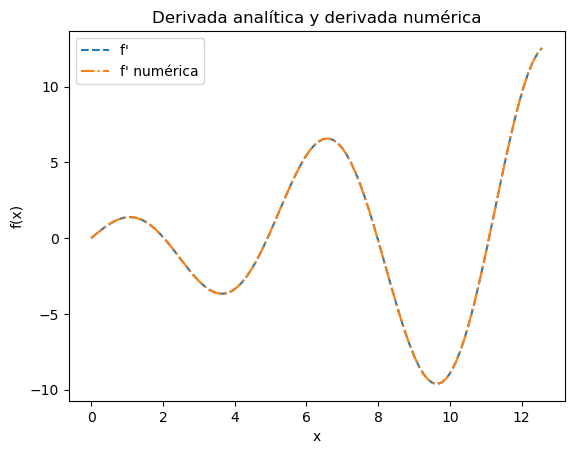

In [5]:
fig, ax = plt.subplots()
ax.set(title = 'Derivada analítica y derivada numérica')
ax.set(xlabel = 'x', ylabel = 'f(x)')
plot(x, dy, '--' , label = "f' ")
plot(x, der_h4, '-.', label = "f' numérica")
legend()
show()

### Integración numérica hasta cuarto orden

Ahora encontraremos la primitiva de una función hasta cuarto orden (inclusive) numéricamente.

In [6]:
def integra_h4(x,f): #Definición de la función. Recibe la malla equiespaciada y una malla del dominio evaluado.
    mod_f, int_f, h = len(f)%2, 0, x[1]-x[0] #Paridad de card(x), valor de la integral y paso.
    
    if mod_f == 0: #Si la malla tiene cardinalidad par
        
        int_f += (-19/720*f[4]+53/360*f[1]-11/30*f[2]+323/360*f[1]-251/720*f[0]) #Calcula el primer intervalo
        
        for i in range(2,len(f)-3,2): #Calcula los intervalos intermedios
            int_f += (-1/90*f[i+2]+17/45*f[i+1]+19/15*f[i]+17/45*f[i-1]-1/90*f[i-2])
            
        int_f += -(-19/720*f[-4]+53/360*f[-3]-11/30*f[-4]+323/360*f[-3]-251/720*f[-2]) #Penúltimo intervalo
        int_f += -(-19/720*f[-3]+53/360*f[-2]-11/30*f[-3]+323/360*f[-2]-251/720*f[-1]) #Último intervalo
        
    else: #Si no es par, es impar. Se calcula como sigue
        
        int_f += (-19/720*f[4]+53/360*f[1]-11/30*f[2]+323/360*f[1]-251/720*f[0]) #Calcula el primer intervalo igual
        
        for i in range(2,len(f)-2,2): #Calcula los intervalos intermedios dejando la última mitad libre
            int_f += (-1/90*f[i+2]+17/45*f[i+1]+19/15*f[i]+17/45*f[i-1]-1/90*f[i-2]) #El cálculo es el mismo
        
        int_f += -(-19/720*f[-3]+53/360*f[-2]-11/30*f[-3]+323/360*f[-2]-251/720*f[-1]) #Último intervalo igual
    
    return int_f * h

In [7]:
# PRUEBA CON EL CASO PAR Y EL CASO IMPAR.
"""
La diferencia entre las dos integrales me parece muy grande. ¿Ves algún error grave?
"""

x_par = linspace(0,2*pi,100)
x_impar = linspace(0,2*pi,101)

y_par = sin(x_par)**2
y_impar = sin(x_impar)**2

integral_par = integra_h4(x_par, y_par)
integral_impar = integra_h4(x_impar, y_impar)


print(integral_par, integral_impar)

3.140669353560447 3.1413509173637273


In [96]:
#Primitiva

"""
Voy sumando a casa entrada del arreglo de ceros el área acumulada, pero se pasa del valor esperado. Utilicé
la misma ecuación que en la calculadora de la integral. El paso y el intervalo de integración me parece que está
correcto y no hay puntos que se salgan en cada paso, aunque aún me falta programar los puntos extremos en los
casos pares e impares
"""

def primitiva_v1(x, f):
    #Falta adaptar esta función a _todos_ los puntos. Hasta ahora solo valen las mallas pares
    h = x[1] - x[0]
    F = zeros_like(f)
    for i in range(2, len(f)-3, 2):
        F[i] = F[i-2] + (-1/90*f[i+2]+17/45*f[i+1]+19/15*f[i]+17/45*f[i-1]-1/90*f[i-2])*h
    
    return F

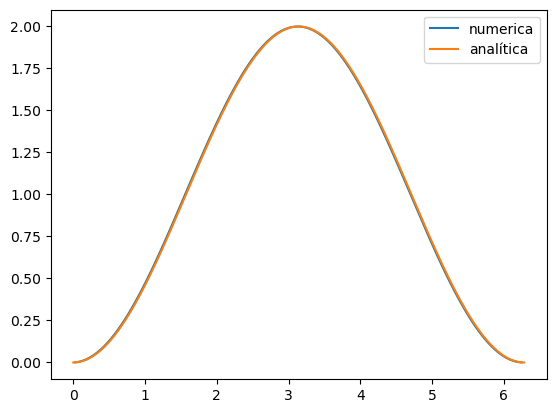

In [120]:
x = linspace(0, 2*pi, 500) #Se da un dominio equiespaciado de 200 puntos entre 0 y 5
prueba = primitiva_v1(x,sin(x)) #Se calcula la primitiva con la función anterior


resultado = []
dom = []
for elem in prueba:
    if elem != 0:
        resultado.append(elem)

        
for i in range(2,len(x)-3,2):
    dom.append(x[i])        

        


# Graficación
plot(dom, resultado, label = 'numerica') #Se da la primitiva numérica
plot(x,-cos(x)+1, label = 'analítica') #Se da la primitiva analítica, que es sin(x)
legend()
show()


#Nótese que la numérica tiene puntos en la imagen mayores a 1 y eso está mal. Parece que hay cosas sumándose de más.

In [10]:
prueba = [1,2,3]
print(zeros_like(prueba))

[0 0 0]
